# Building the Classifier

# 1.Load the data

In [28]:
!pip install xgboost

In [29]:
# Importing Libraries

# Utitlity Libraries
import numpy as np
import pandas as pd

# Visualisation Libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Algorithm, Evaluation, and Model Libraries 
from sklearn.linear_model import RidgeClassifier
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
from sklearn.metrics import recall_score
from xgboost import XGBClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder




In [30]:
# Importing necessary libraries
import pandas as pd

# Loading Data
data = pd.read_csv("C:/Users/91709/Downloads/archive/WA_Fn-UseC_-Telco-Customer-Churn.csv")

# Printing Data
data.head()



,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


# 2.Analyze and visualize the dataset

In [31]:
data.shape



(7043, 21)

In [32]:
data.isna().sum()


customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [33]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [34]:
data.describe()


,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


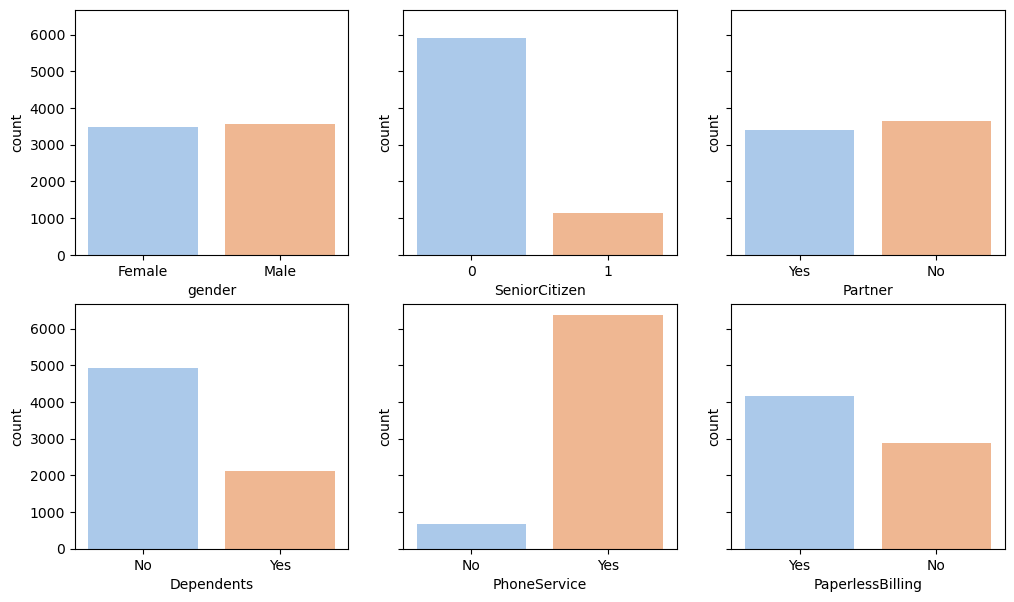

In [35]:
with sns.color_palette("pastel"):
    fig, axes = plt.subplots(2, 3, figsize=(12, 7), sharey=True)
    sns.countplot(x="gender", data=data, ax=axes[0, 0])
    sns.countplot(x="SeniorCitizen", data=data, ax=axes[0, 1])
    sns.countplot(x="Partner", data=data, ax=axes[0, 2])
    sns.countplot(x="Dependents", data=data, ax=axes[1, 0])
    sns.countplot(x="PhoneService", data=data, ax=axes[1, 1])
    sns.countplot(x="PaperlessBilling", data=data, ax=axes[1, 2])

plt.show()


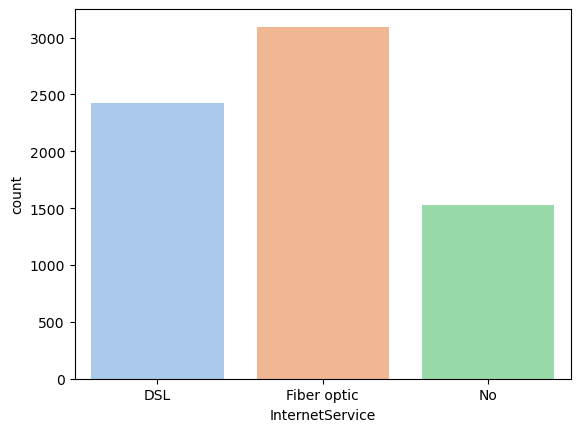

In [36]:
with sns.color_palette("pastel"):
    sns.countplot(x="InternetService", data=data)


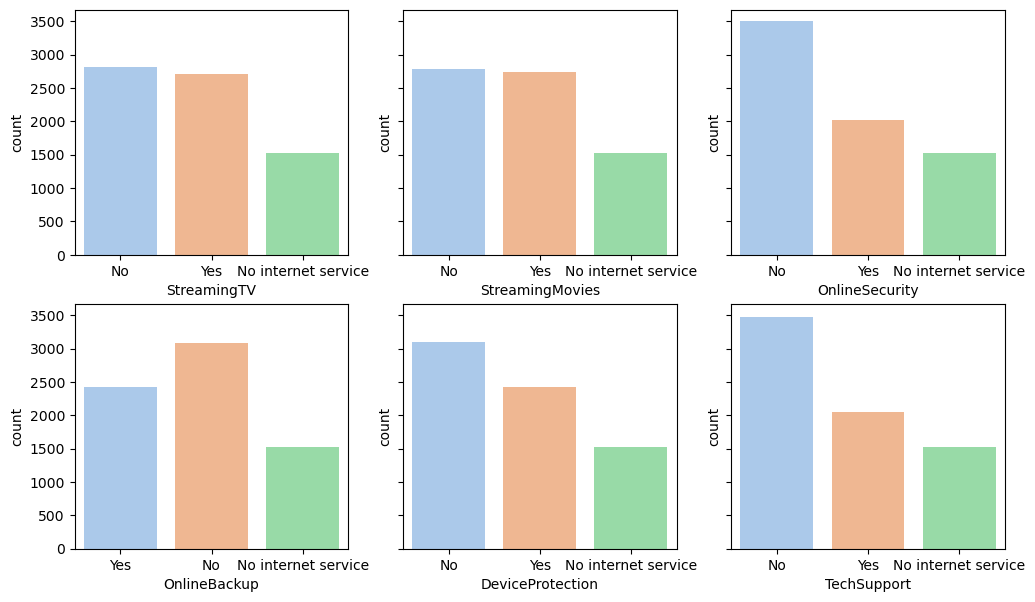

In [37]:
with sns.color_palette("pastel"):
    fig, axes = plt.subplots(2, 3, figsize=(12, 7), sharey=True)
    sns.countplot(x="StreamingTV", data=data, ax=axes[0, 0])
    sns.countplot(x="StreamingMovies", data=data, ax=axes[0, 1])
    sns.countplot(x="OnlineSecurity", data=data, ax=axes[0, 2])
    sns.countplot(x="OnlineBackup", data=data, ax=axes[1, 0])
    sns.countplot(x="DeviceProtection", data=data, ax=axes[1, 1])
    sns.countplot(x="TechSupport", data=data, ax=axes[1, 2])

plt.show()

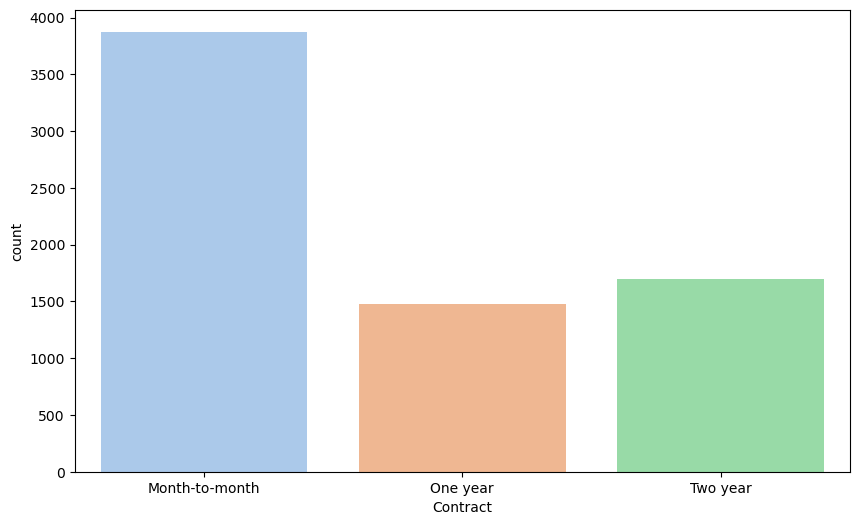

In [38]:
with sns.color_palette("pastel"):
    plt.figure(figsize=(10,6))
    sns.countplot(x="Contract", data=data)


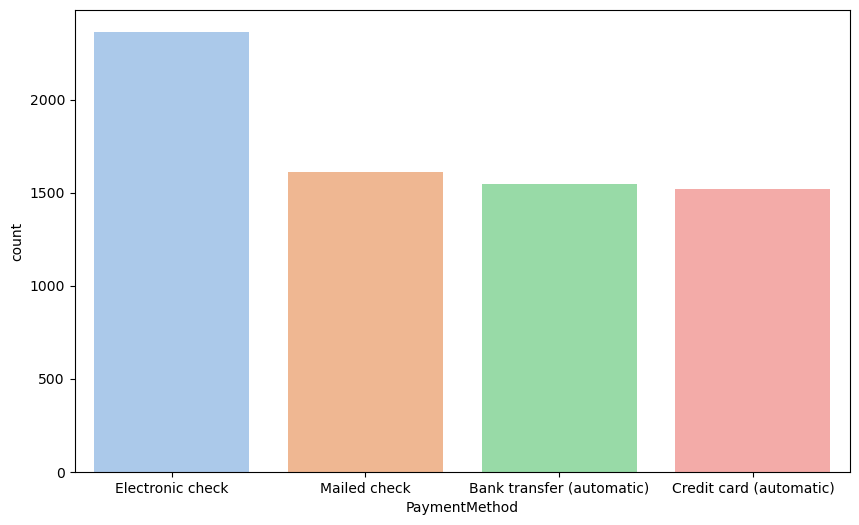

In [39]:
with sns.color_palette("pastel"):
    plt.figure(figsize=(10,6))
    sns.countplot(x="PaymentMethod", data=data)


In [40]:
genderval = pd.pivot_table(data, values='Churn', index=['gender'],
                    columns=['SeniorCitizen'], aggfunc=np.mean)
genderval


C:\Users\91709\AppData\Local\Temp\ipykernel_17920\2758274805.py:1: FutureWarning: The operation <function mean at 0x000001F4DD1836D0> failed on a column. If any error is raised, this will raise an exception in a future version of pandas. Drop these columns to avoid this warning.
  genderval = pd.pivot_table(data, values='Churn', index=['gender'],


SeniorCitizen
gender
Female
Male


In [41]:
genderval = pd.pivot_table(data, values='Churn', index=['gender'],
                    columns=['SeniorCitizen'], aggfunc=np.mean)
genderval


C:\Users\91709\AppData\Local\Temp\ipykernel_17920\2758274805.py:1: FutureWarning: The operation <function mean at 0x000001F4DD1836D0> failed on a column. If any error is raised, this will raise an exception in a future version of pandas. Drop these columns to avoid this warning.
  genderval = pd.pivot_table(data, values='Churn', index=['gender'],


SeniorCitizen
gender
Female
Male


C:\Users\91709\AppData\Local\Temp\ipykernel_17920\1176047748.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data["tenure"], ax=axes[0])
C:\Users\91709\AppData\Local\Temp\ipykernel_17920\1176047748.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data["MonthlyCharges"], ax=axes[1])


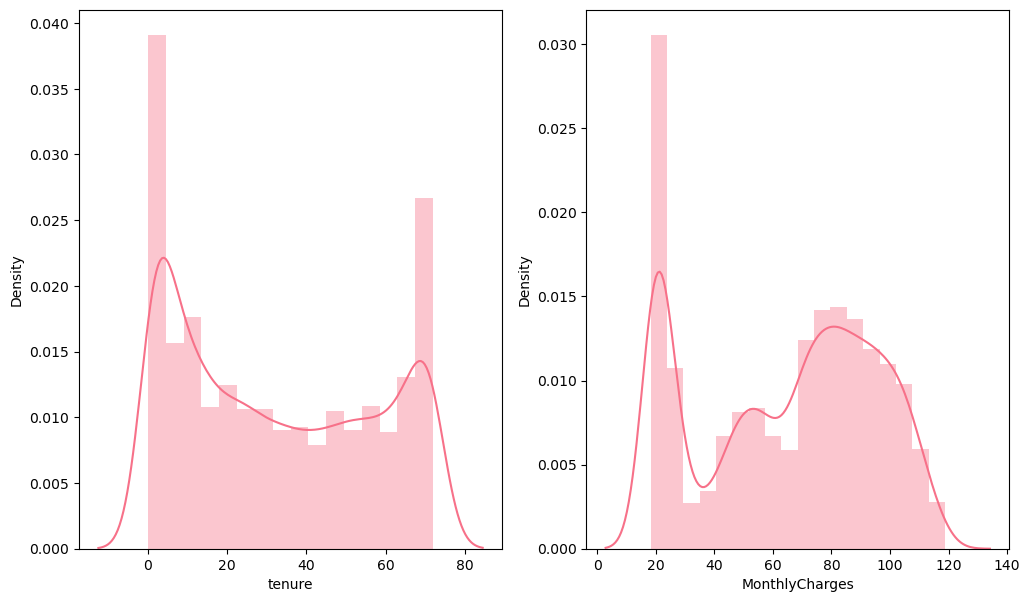

In [42]:
with sns.color_palette("husl"):
    fig, axes = plt.subplots(1,2, figsize=(12, 7))
    sns.distplot(data["tenure"], ax=axes[0])
    sns.distplot(data["MonthlyCharges"], ax=axes[1])


# 3.Data Cleaning

In [43]:
churnnum = {'Yes':1, 'No':0}
data.Churn.replace(churnnum, inplace=True)
churnnum


{'Yes': 1, 'No': 0}

In [44]:
genderval = pd.pivot_table(data, values='Churn', index=['gender'],
                    columns=['SeniorCitizen'], aggfunc=np.mean)
genderval


SeniorCitizen,0,1
gender,,
Female,0.239384,0.422535
Male,0.232808,0.411150


In [45]:
data.drop(['customerID','gender','Contract','TotalCharges'], axis=1, inplace=True)
data.columns



Index(['SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService',
       'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges', 'Churn'],
      dtype='object')

In [46]:

X = data.drop('Churn', axis=1)  # Features
y = data['Churn']  # Target variable

# Rest of the code for resampling
nox = X[y == 0]  # Assuming 'y' is the target variable
noy = X[y == 1]

yes_upsampled = noy.sample(n=len(nox), replace=True, random_state=42)
print(len(yes_upsampled))

5174


# 4.Feature Engineering

In [47]:
minmax = MinMaxScaler()
a = minmax.fit_transform(data[['tenure']])
b = minmax.fit_transform(data[['MonthlyCharges']])
X['tenure'] = a
X['MonthlyCharges'] = b

X.shape


(7043, 16)

In [48]:

data.PhoneService.value_counts()





Yes    6361
No      682
Name: PhoneService, dtype: int64

In [49]:
data.MultipleLines.value_counts()


No                  3390
Yes                 2971
No phone service     682
Name: MultipleLines, dtype: int64

# Find out various clusters based on customer behavior

C:\Users\91709\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


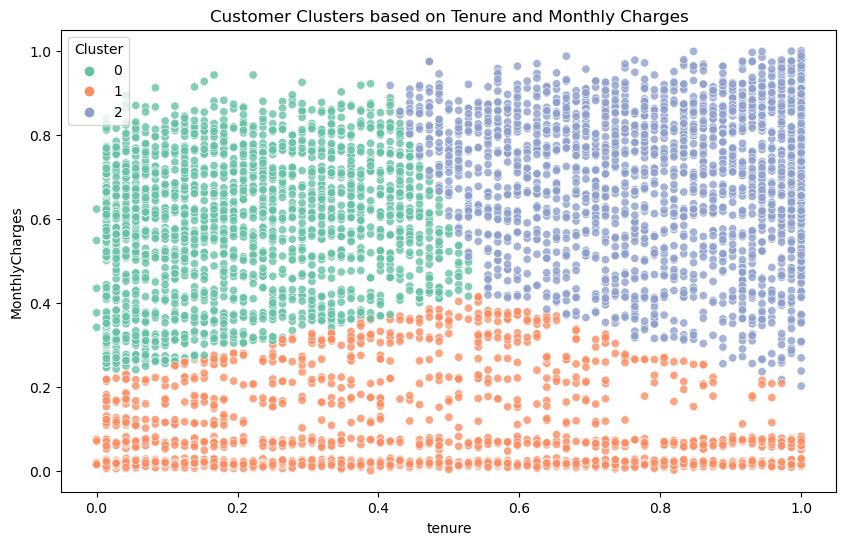

In [51]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Selecting relevant features for clustering
clustering_features = ['tenure', 'MonthlyCharges']

# Create a copy of the dataframe before one-hot encoding
X_copy = X.copy()



# Standardize the features
scaler = StandardScaler()
X_cluster = scaler.fit_transform(X_copy[clustering_features])

# Determine the number of clusters (you can adjust this based on your analysis)
num_clusters = 3

# Applying K-means clustering
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
X['Cluster'] = kmeans.fit_predict(X_cluster)

# Visualizing the clusters
with sns.color_palette("husl"):
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x=X['tenure'], y=X['MonthlyCharges'], hue=X['Cluster'], palette='Set2', legend='full', alpha=0.8)
    plt.title('Customer Clusters based on Tenure and Monthly Charges')
    plt.show()

# Analyzing Variables Impact on Churn

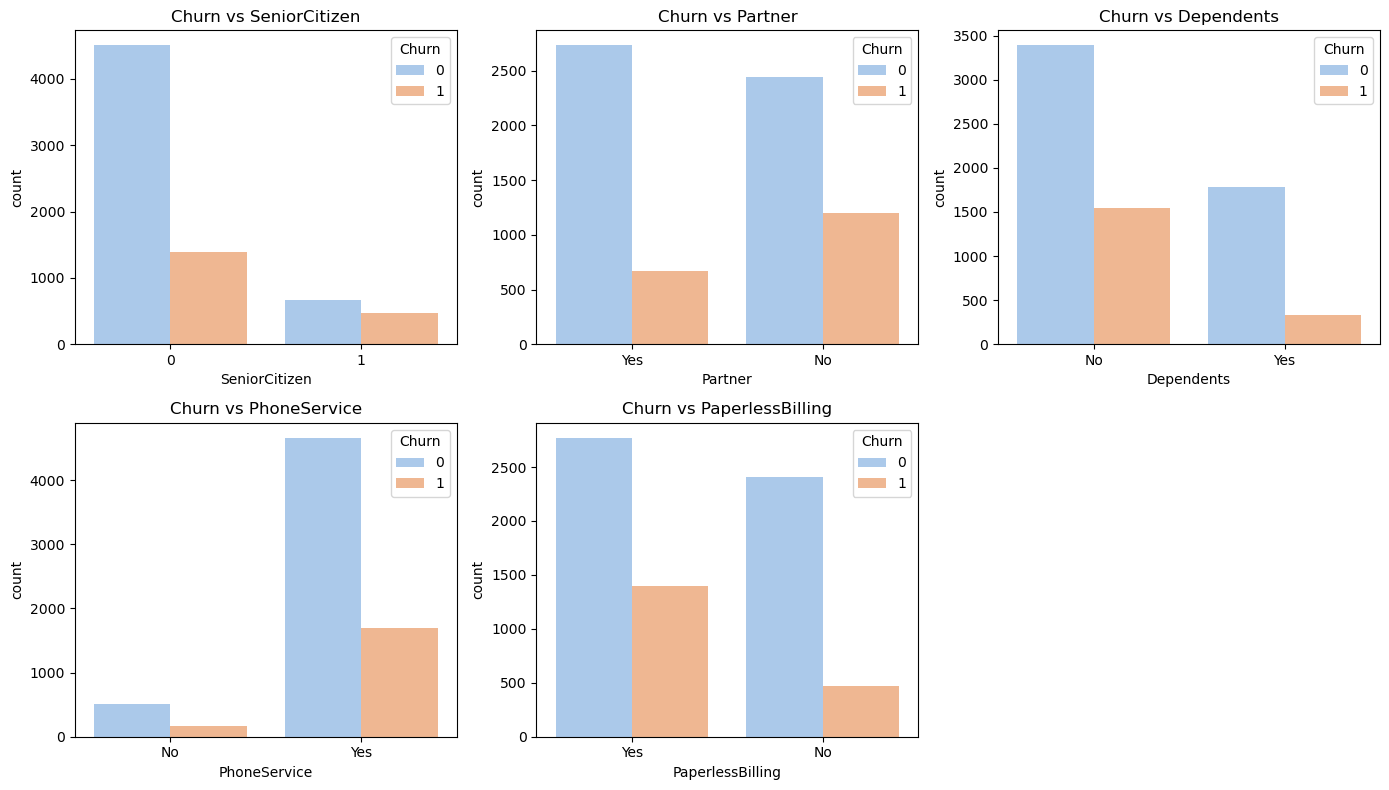

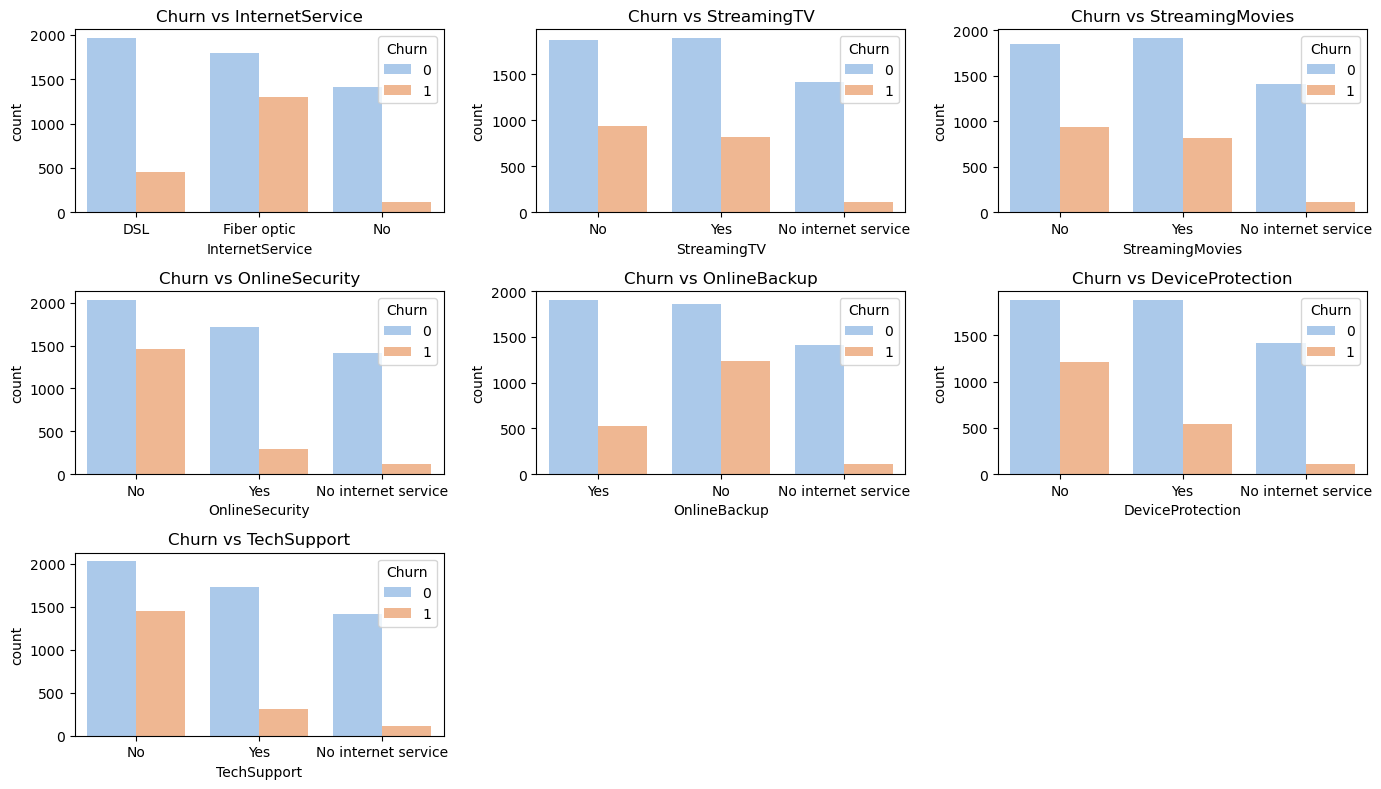

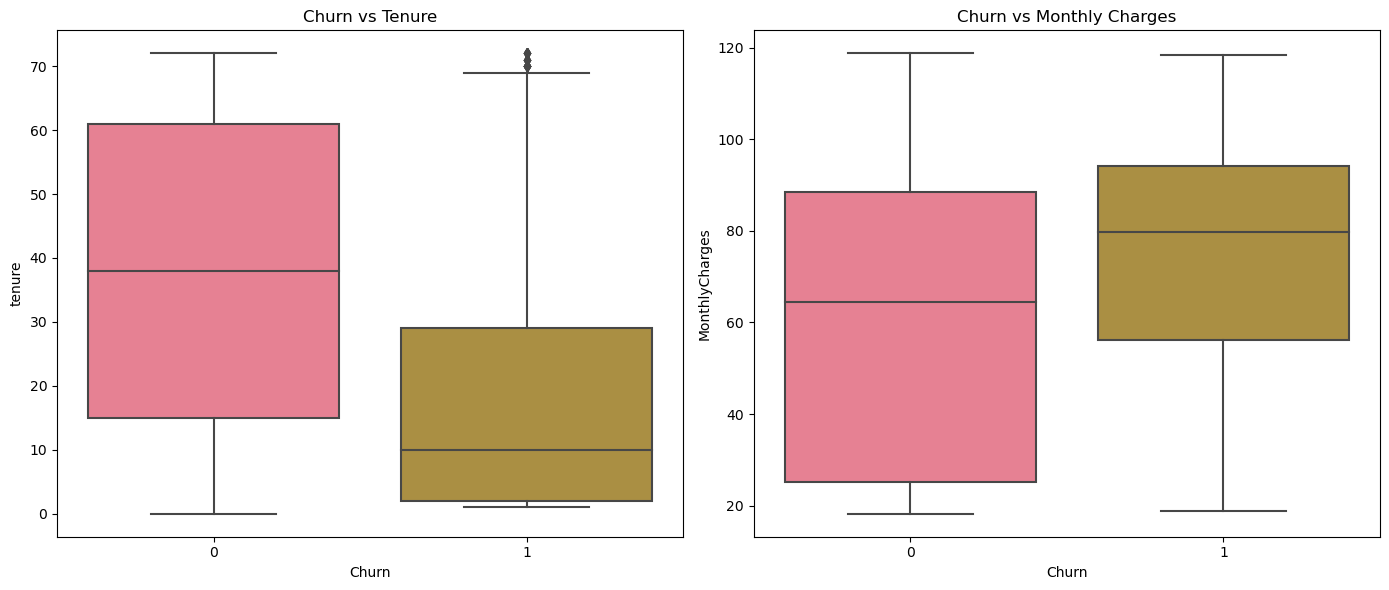

In [52]:
# Analyzing how different variables affect churn
with sns.color_palette("pastel"):
    plt.figure(figsize=(14, 8))
    for i, column in enumerate(['SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'PaperlessBilling']):
        plt.subplot(2, 3, i+1)
        sns.countplot(x=column, hue='Churn', data=data)
        plt.title(f'Churn vs {column}')
    plt.tight_layout()
    plt.show()

with sns.color_palette("pastel"):
    plt.figure(figsize=(14, 8))
    for i, column in enumerate(['InternetService', 'StreamingTV', 'StreamingMovies', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport']):
        plt.subplot(3, 3, i+1)
        sns.countplot(x=column, hue='Churn', data=data)
        plt.title(f'Churn vs {column}')
    plt.tight_layout()
    plt.show()

# Checking numerical features against churn
with sns.color_palette("husl"):
    fig, axes = plt.subplots(1, 2, figsize=(14, 6))
    sns.boxplot(x='Churn', y='tenure', data=data, ax=axes[0])
    axes[0].set_title('Churn vs Tenure')
    sns.boxplot(x='Churn', y='MonthlyCharges', data=data, ax=axes[1])
    axes[1].set_title('Churn vs Monthly Charges')
    plt.tight_layout()
    plt.show()

# Running Cluster Analysis

C:\Users\91709\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


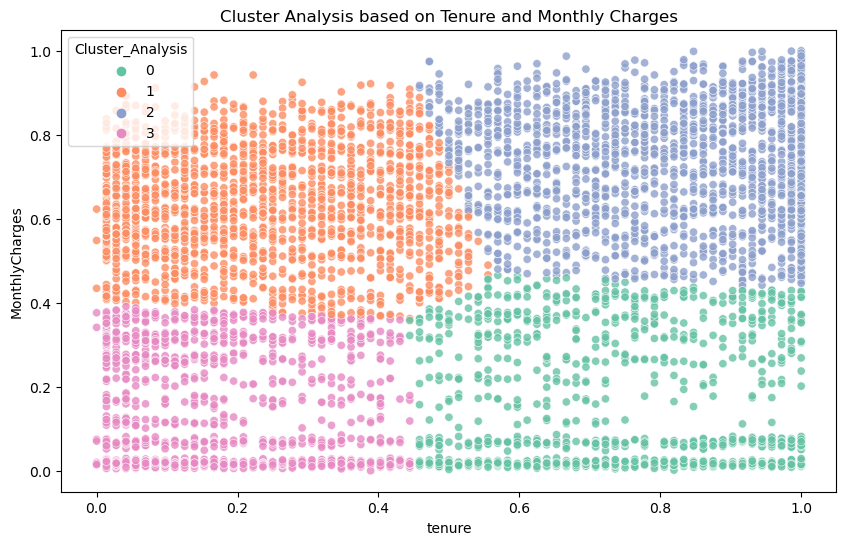

In [53]:
# Selecting features for cluster analysis
cluster_analysis_features = ['tenure', 'MonthlyCharges']

# Standardizing the features
scaler_cluster = StandardScaler()
X_cluster_analysis = scaler_cluster.fit_transform(X[cluster_analysis_features])

# Running K-means clustering for analysis
num_clusters_analysis = 4  # You can adjust this based on your analysis
kmeans_analysis = KMeans(n_clusters=num_clusters_analysis, random_state=42)
X['Cluster_Analysis'] = kmeans_analysis.fit_predict(X_cluster_analysis)

# Visualizing the clusters for analysis
with sns.color_palette("husl"):
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x=X['tenure'], y=X['MonthlyCharges'], hue=X['Cluster_Analysis'], palette='Set2', legend='full', alpha=0.8)
    plt.title('Cluster Analysis based on Tenure and Monthly Charges')
    plt.show()

# Profiling the Different Clusters

In [54]:
# Profiling the different clusters
cluster_profile = X.groupby('Cluster_Analysis').mean()
print(cluster_profile)

                  SeniorCitizen    tenure  MonthlyCharges   Cluster
Cluster_Analysis                                                   
0                      0.077056  0.751599        0.157002  1.210390
1                      0.230944  0.205712        0.626526  0.078494
2                      0.215164  0.815958        0.743976  2.000000
3                      0.071594  0.145665        0.141499  0.710739


C:\Users\91709\AppData\Local\Temp\ipykernel_17920\1553272915.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  cluster_profile = X.groupby('Cluster_Analysis').mean()


# 5.Dataset Splitting

In [23]:
# Select categorical columns (excluding 'Churn')
categorical_columns = ['SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService',
       'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges']

# One-hot encode categorical columns
encoder = OneHotEncoder(drop='first', sparse=False)
X_encoded = pd.DataFrame(encoder.fit_transform(X[categorical_columns]))
X = pd.concat([X.drop(categorical_columns, axis=1), X_encoded], axis=1)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Ridge Classifier
ridgeclassifier = RidgeClassifier() 

# Fitting Classifier
ridgeclassifier.fit(X_train, y_train) 

# Predicting training values
pred = ridgeclassifier.predict(X_train)

# Getting accuracy
train_accuracy = accuracy_score(y_train, pred)
print(f"Training Accuracy: {train_accuracy:.2f}")

# Predicting testing values
pred_test = ridgeclassifier.predict(X_test)

# Printing accuracy
test_accuracy = accuracy_score(y_test, pred_test)
print(f"Testing Accuracy: {test_accuracy:.2f}")


C:\Users\91709\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:828: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Training Accuracy: 0.87
Testing Accuracy: 0.77


#  Random Forest Classifier

In [24]:
# Random Forest

# Creating Model
randomforest = RandomForestClassifier(n_estimators=250, max_depth=18)

# Fitting Model
randomforest.fit(X_train, y_train)


RandomForestClassifier(max_depth=18, n_estimators=250)

In [25]:
# Pridicting training accuracy
pred = randomforest.predict(X_train)

# Printing training accuracy
accuracy_score(y_train, pred)

# Predicting testing accuracy
pred_test = randomforest.predict(X_test)

# Printing testing score
accuracy_score(y_test, pred_test)


0.7842441447835344

# Using Grid Search CV to improve accuracy

In [ ]:
# Grid Search

# Setting parameters
parameters = {'n_estimators':[150,200,250,300], 'max_depth':[15,20,25]}

# Using Grid Search with Random Forest Classifier
forest = RandomForestClassifier()
clf = GridSearchCV(estimator=forest, param_grid=parameters, n_jobs=-1, cv=5)

# Fitting the model
clf.fit(X, y)


In [ ]:
# Getting the best parameters and score
clf.best_params_
{'max_depth': 20, 'n_estimators': 150}
clf.best_score_


In [ ]:
# Grid Search To Get Best Hyperparameters
parameters = {'C':[0.01,0.1,1,3,5,10]}
svmclf = SVC(class_weight='balanced',random_state=43)
grid = GridSearchCV(estimator=svmclf, param_grid=parameters,scoring='accuracy',return_train_score=True,verbose=1)
grid.fit(X_train,y_train)

# Plotting the values
cv_result = pd.DataFrame(grid.cv_results_)
plt.scatter(cv_result['param_C'],cv_result['mean_train_score'])
plt.plot(cv_result['param_C'],cv_result['mean_train_score'],label='Train')
plt.scatter(cv_result['param_C'],cv_result['mean_test_score'])
plt.plot(cv_result['param_C'],cv_result['mean_test_score'],label="CV")
plt.title('Hyperparameter vs accuracy')
plt.legend()
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.show()


Fitting 5 folds for each of 6 candidates, totalling 30 fits


# svm classifier

Train accuracy SVM:  0.9066382676606318
Test accuracy SVM:  0.7636621717530163
Recall Score:  0.707774798927614


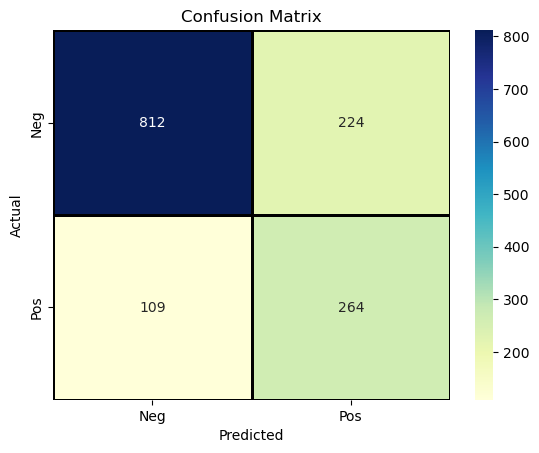

In [28]:
# Training the model using the optimal parameters discovered with SVM Classifier
svmclf =  SVC(C=3,class_weight='balanced', random_state=43)
svmclf.fit(X_train,y_train)

result2 = ["2.","SVM","Balanced using class weights"]
y_pred_tr = svmclf.predict(X_train)
print('Train accuracy SVM: ',accuracy_score(y_train,y_pred_tr))
result2.append(round(accuracy_score(y_train,y_pred_tr),2))

y_pred_test = svmclf.predict(X_test)
print('Test accuracy SVM: ',accuracy_score(y_test,y_pred_test))
result2.append(round(accuracy_score(y_test,y_pred_test),2))

recall = recall_score(y_test,y_pred_test)
print("Recall Score: ",recall)
result2.append(round(recall,2))

# Building a confusion matrix
matrix = confusion_matrix(y_test,y_pred_test)
ax=plt.subplot();
sns.heatmap(matrix, annot=True, fmt='d', linewidths=2, linecolor='black', cmap='YlGnBu',ax=ax)
ax.set_xlabel('Predicted')
ax.set_ylabel('Actual')
ax.set_ylim(2.0,0)
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(['Neg','Pos'])
ax.yaxis.set_ticklabels(['Neg','Pos'])
plt.show()


In [55]:
import math
scale=round(math.sqrt(y_train.value_counts()[0]/y_train.value_counts()[1]),2)


In [ ]:
# Grid Search To Get Best Hyperparameters
parameters = {"learning_rate"    : [0.10,0.20,0.30 ],\
              "max_depth"        : [ 3,5,10,20],\
              "n_estimators" : [ 100, 200, 300, 500],\
              "colsample_bytree" : [ 0.3, 0.5, 0.7 ] }
clf_xgb = XGBClassifier(scale_pos_weight=scale, eval_metric ='mlogloss')
grid = GridSearchCV(estimator=clf_xgb, param_grid=parameters, scoring='accuracy',return_train_score=True,verbose=1)
grid.fit(X_train,y_train)

# plotting only the first 70 train scores
cv_result = pd.DataFrame(grid.cv_results_).sort_values(by='mean_train_score',ascending=True)[:70]
param_list = list(cv_result['params'])
param_index = np.arange(70)
plt.figure(figsize=(18,6))
plt.scatter(param_index,cv_result['mean_train_score'])
plt.plot(param_index,cv_result['mean_train_score'],label='Train')
plt.scatter(param_index,cv_result['mean_test_score'])
plt.plot(param_index,cv_result['mean_test_score'],label="CV")
plt.title('Hyperparameter vs accuracy')
plt.grid()
plt.legend()
plt.xlabel('Hyperparametr combination Dict')
plt.ylabel('Accuracy')
plt.show()


Fitting 5 folds for each of 144 candidates, totalling 720 fits


In [ ]:
best_parameters = param_list[34]
print(best_parameters)


In [ ]:
# Using XG Boost
clf_xgb = XGBClassifier(learning_rate= best_parameters['learning_rate'] ,max_depth=best_parameters ['max_depth'], n_estimators=best_parameters['n_estimators'], colsample_bytree=best_parameters['colsample_bytree'],                        eval_metric='mlogloss',scale_pos_weight=scale)
clf_xgb.fit(X_train,y_train)

xgbresult = ["4.","XGBClassifier","Balanced using scale_pos_weight"]
y_pred_tr = clf_xgb.predict(X_train)
print('Train accuracy XGB: ',accuracy_score(y_train,y_pred_tr))
xgbresult.append(round(accuracy_score(y_train,y_pred_tr),2))

y_pred_test = clf_xgb.predict(X_train)
print('Test accuracy XGB: ',accuracy_score(y_test,y_pred_test))
xgbresult.append(round(accuracy_score(y_test,y_pred_test),2))

recall = recall_score(y_test,y_pred_test)
print("Recall Score: ",recall)
xgbresult.append(round(recall,2))

# Building confusion matrix
cm = confusion_matrix(y_test,y_pred_test)
ax=plt.subplot();
sns.heatmap(cm, annot=True, fmt='d', linewidths=2, linecolor='black', cmap='YlGnBu',ax=ax)
ax.set_xlabel('Predicted')
ax.set_ylabel('Actual')
ax.set_ylim(2.0,0)
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(['Neg','Pos'])
ax.yaxis.set_ticklabels(['Neg','Pos'])
plt.show()
